<a href="https://colab.research.google.com/github/Raviteja0707200/SCT_DS_3/blob/main/task3_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3rd




0.9149065307113377
[[7035  268]
 [ 433  502]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.54      0.59       935

    accuracy                           0.91      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238



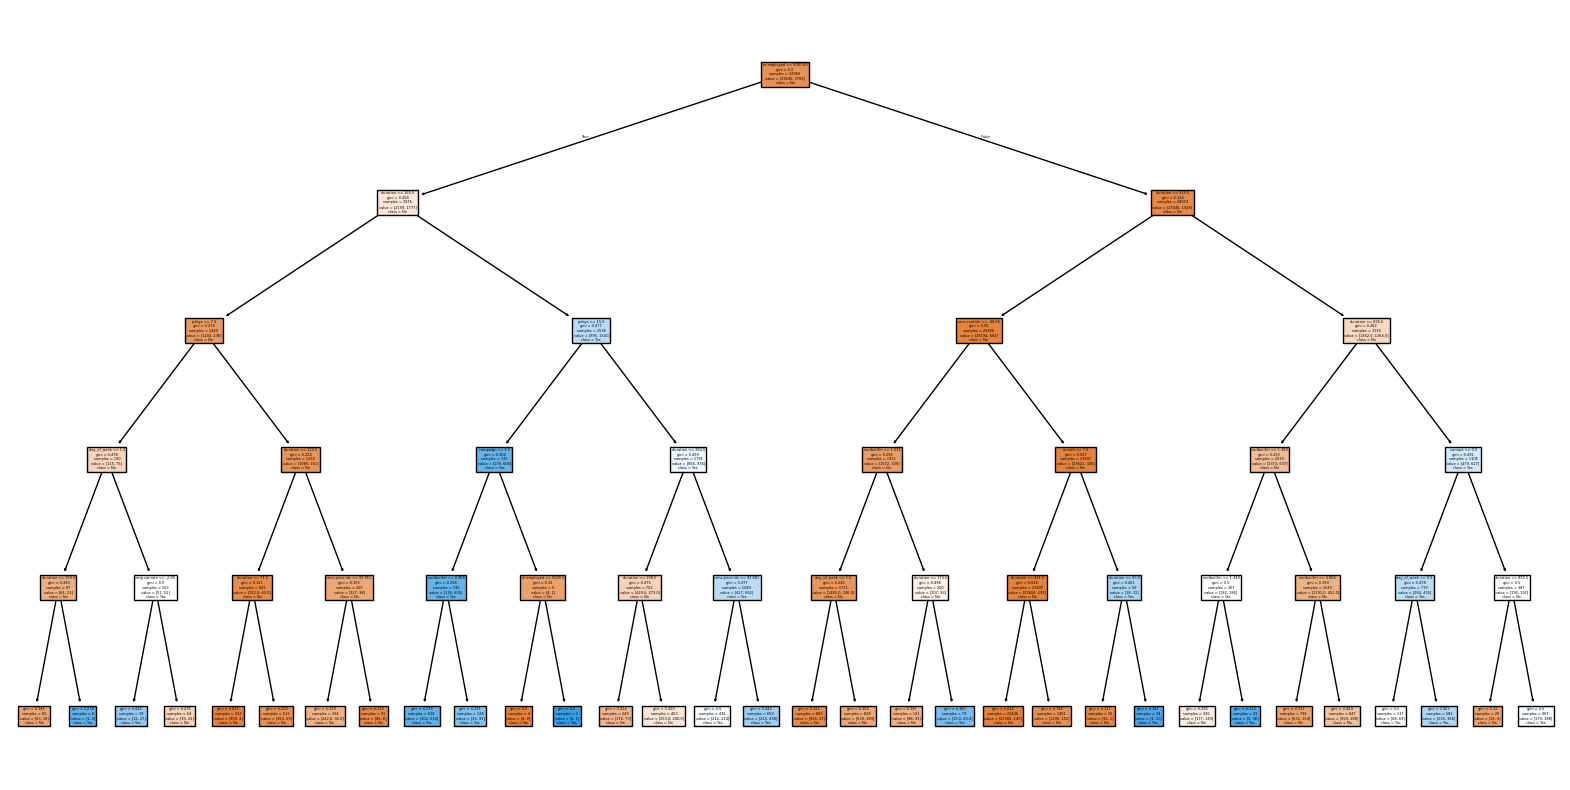

In [ ]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

assert "bank+marketing.zip" in os.listdir()

with zipfile.ZipFile("bank+marketing.zip", "r") as z:
    z.extractall("bank_data")

with zipfile.ZipFile("bank_data/bank-additional.zip", "r") as z_inner:
    z_inner.extractall("bank_data/bank-additional")

data = pd.read_csv(
    "bank_data/bank-additional/bank-additional/bank-additional-full.csv",
    sep=";"
)

encoder = LabelEncoder()
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = encoder.fit_transform(data[col])

X = data.drop("y", axis=1)
y = data["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True
)
plt.show()
